En este ejercicio, existe una probabilidad equiprobable de elegir una acción, 25%, y no se busca la politica optima. Usa la ecuacion de Bellman 3.14 del libro de texto, que es la ec de Bellman para $v_\pi$. **Expresa la relación entre el valor de un estado y los valores de sus estados sucesores.**

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

#matplotlib.use('Agg')

In [2]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTIONS_FIGS=[ '←', '↑', '→', '↓']


ACTION_PROB = 0.25

In [3]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward

In [4]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

In [5]:
value2 = np.zeros((WORLD_SIZE, WORLD_SIZE))
np.abs(value2)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

new_value[ 0 , 0 ]: -0.25 ACTION_PROB: 0.25 reward: -1.0 DISCOUNT: 0.9 new_value[ 0 , 0 ]: -0.25
new_value[ 0 , 0 ]: -0.5 ACTION_PROB: 0.25 reward: -1.0 DISCOUNT: 0.9 new_value[ 0 , 0 ]: -0.5
new_value[ 0 , 0 ]: -0.5 ACTION_PROB: 0.25 reward: 0 DISCOUNT: 0.9 new_value[ 0 , 0 ]: -0.5
new_value[ 0 , 0 ]: -0.5 ACTION_PROB: 0.25 reward: 0 DISCOUNT: 0.9 new_value[ 0 , 0 ]: -0.5
new_value[ 0 , 1 ]: 2.5 ACTION_PROB: 0.25 reward: 10 DISCOUNT: 0.9 new_value[ 0 , 1 ]: 2.5
new_value[ 0 , 1 ]: 5.0 ACTION_PROB: 0.25 reward: 10 DISCOUNT: 0.9 new_value[ 0 , 1 ]: 5.0
new_value[ 0 , 1 ]: 7.5 ACTION_PROB: 0.25 reward: 10 DISCOUNT: 0.9 new_value[ 0 , 1 ]: 7.5
new_value[ 0 , 1 ]: 10.0 ACTION_PROB: 0.25 reward: 10 DISCOUNT: 0.9 new_value[ 0 , 1 ]: 10.0
new_value[ 0 , 2 ]: 0.0 ACTION_PROB: 0.25 reward: 0 DISCOUNT: 0.9 new_value[ 0 , 2 ]: 0.0
new_value[ 0 , 2 ]: -0.25 ACTION_PROB: 0.25 reward: -1.0 DISCOUNT: 0.9 new_value[ 0 , 2 ]: -0.25
new_value[ 0 , 2 ]: -0.25 ACTION_PROB: 0.25 reward: 0 DISCOUNT: 0.9 new

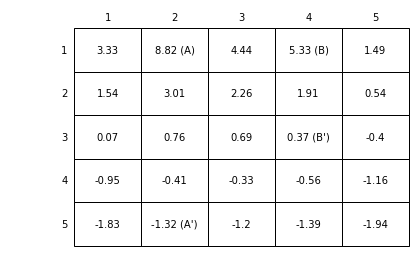

In [6]:
if __name__ == '__main__':

    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    iteracion = 0
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    #print("i:",i, "j:", j, "action:", action)
                    (next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])
                    print("new_value[",i,",",j,"]:", new_value[i, j], "ACTION_PROB:", ACTION_PROB, "reward:", reward, "DISCOUNT:", DISCOUNT, "new_value[",i,",", j,"]:", new_value[i, j])
                    #print("new_value[",i,",", j,"]:", new_value[i, j])
        print("np.sum(np.abs(value - new_value)):", np.sum(np.abs(value - new_value))) 
        iteracion += 1
        print("iteracion:", iteracion)
        print("new_value:", new_value)
     
        if np.sum(np.abs(value - new_value)) < 1e-1:
            draw_image(np.round(new_value, decimals=2))
            #plt.savefig('../images/figure_3_2.png')
            plt.show()
            plt.close()
            break
        value = new_value  